In [1]:
options(warn=-1)

In [3]:
library(tidyr)
library(dplyr)
library(ggplot2)
library(patchwork)
library(pheatmap)

In [5]:
main_theme = theme_minimal() + 
    theme(strip.text = element_text(size=20),
    axis.text.y = element_text(colour = "black", size = 20, face = "bold"), 
    axis.text.x = element_text(colour = "black", face = "bold", size = 20), 
    legend.text = element_text(size = 18, face ="bold", colour ="black"), 
    legend.position = "none", 
    axis.title.y = element_text(face = "bold", size = 0), 
    axis.title.x = element_text(face = "bold", size = 0, colour = "black"), 
    legend.title = element_text(size = 14, colour = "black", face = "bold"), 
    panel.background = element_blank(), 
    panel.border = element_rect(colour = "black", fill = NA, size = 0),
    legend.key=element_blank()) 

In [4]:
spc <- read.csv('/path/to/data/spc.csv', sep = ",", header = T, row.names = 1)
names(spc) <- gsub("^X", "", names(spc))
head(spc)

,vial,397.307,401.164,405.022,408.879,412.736,416.594,420.451,424.308,428.166,⋯,dim_da,dim_ket,dim_mast,met_in,da_in,ket_in,mast_in,disease_in,disease_min,disease
,<chr>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>
1,JM006 1000,-0.07326907,1,1,1,-0.1279949,-0.1188428,-0.1338351,14.81902,-0.1274847,⋯,NA,NA,NA,NA,NA,NA,NA,Inf,Inf,0
2,JM006 1002,0.04021398,1,1,1,14.9473063,0.1117955,14.7098770,14.71823,14.7977676,⋯,NA,NA,NA,NA,NA,NA,NA,Inf,Inf,0
3,JM006 1003,15.05952360,1,1,1,0.8254424,0.1740542,14.9310503,14.90867,0.2375899,⋯,NA,NA,NA,NA,NA,NA,NA,Inf,Inf,0
4,JM006 1004,15.64211768,1,1,1,14.8384736,0.1018710,14.8572984,14.94703,0.2181086,⋯,NA,NA,NA,NA,NA,NA,NA,Inf,Inf,0
5,JM006 1005,14.67025372,1,1,1,14.8736669,14.5768853,14.6524259,14.83394,15.0828729,⋯,NA,NA,NA,NA,NA,NA,NA,Inf,Inf,0
6,JM006 1006,0.35748126,1,1,1,15.1296416,14.8059751,14.8534811,14.84384,14.9129939,⋯,NA,NA,16,NA,NA,NA,12,12,16,1


#### Figure 5A

In [6]:
filter_data <- function(data) {
  data_filtered <- data[, which(as.numeric(colnames(data)) > 1000 & as.numeric(colnames(data)) < 3000)]
  data_filtered <- data_filtered[, which(as.numeric(colnames(data_filtered)) < 1580 | as.numeric(colnames(data_filtered)) > 1700)]
  data_filtered <- data.frame(absorbance = colMeans(data_filtered, na.rm = TRUE), sds = sapply(data_filtered, sd))
  data_filtered$wavenum <- as.numeric(rownames(data_filtered))
  
  return(data_filtered)
}

health <- spc %>% filter(disease == 0 & dim >= 1 & dim <= 7)
health_filtered <- health[, which(as.numeric(colnames(health)) > 1000 & as.numeric(colnames(health)) < 3000)]
health_filtered <- health_filtered[, which(as.numeric(colnames(health_filtered)) < 1580 | as.numeric(colnames(health_filtered)) > 1700)]
health_filtered <- data.frame(absorbance = colMeans(health_filtered, na.rm = TRUE), sds = sapply(health_filtered, sd))
health_filtered$wavenum <- as.numeric(rownames(health_filtered))
health_filtered$group <- 'health'

met <- spc[!is.na(spc$dim_met) & is.na(spc$dim_mast) & is.na(spc$dim_ket) & is.na(spc$dim_da) & spc$disease_in <= 7 & spc$dim <= 7 & spc$dim >= 1, ]
met_h <- met[met$dim <= 7 & met$disease_in <= 7,] 
filtered_met_h <- filter_data(met_h)
filtered_met_h$group <- 'met'
met_0 <- met[met$dim == 0,] 
filtered_met_0 <- filter_data(met_0)
filtered_met_0$group <- '0'
met_1 <- met[met$dim == 1,] 
filtered_met_1 <- filter_data(met_1)
filtered_met_1$group <- '1'
met_2 <- met[met$dim == 2,] 
filtered_met_2 <- filter_data(met_2)
filtered_met_2$group <- '2'
met_3 <- met[met$dim == 3,] 
filtered_met_3 <- filter_data(met_3)
filtered_met_3$group <- '3'
met_4 <- met[met$dim == 4,] 
filtered_met_4 <- filter_data(met_4)
filtered_met_4$group <- '4'
met_5 <- met[met$dim >= 5 & met$dim <= 7,]
filtered_met_5 <- filter_data(met_5)
filtered_met_5$group <- '5'
met_filtered <- rbind(filtered_met_1, filtered_met_2, filtered_met_3, filtered_met_4, filtered_met_5)

mast <- spc[!is.na(spc$dim_mast) & is.na(spc$dim_met) & is.na(spc$dim_ket) & is.na(spc$dim_da) & spc$disease_in <= 7 & spc$dim <= 7 & spc$dim >= 1, ]
mast_h <- mast[mast$dim <= 7 & mast$disease_in <= 7,] 
filtered_mast_h <- filter_data(mast_h)
filtered_mast_h$group <- 'mast'
mast_0 <- mast[mast$dim == 0,] 
filtered_mast_0 <- filter_data(mast_0)
filtered_mast_0$group <- '0'
mast_1 <- mast[mast$dim == 1,] 
filtered_mast_1 <- filter_data(mast_1)
filtered_mast_1$group <- '1'
mast_2 <- mast[mast$dim == 2,] 
filtered_mast_2 <- filter_data(mast_2)
filtered_mast_2$group <- '2'
mast_3 <- mast[mast$dim == 3,] 
filtered_mast_3 <- filter_data(mast_3)
filtered_mast_3$group <- '3'
mast_4 <- mast[mast$dim == 4,] 
filtered_mast_4 <- filter_data(mast_4)
filtered_mast_4$group <- '4'
mast_5 <- mast[mast$dim >= 5 & mast$dim <=7,] 
filtered_mast_5 <- filter_data(mast_5)
filtered_mast_5$group <- '5'
mast_filtered <- rbind(filtered_mast_1, filtered_mast_2, filtered_mast_3, filtered_mast_4, filtered_mast_5)

spc_h <- rbind(filtered_met_h, filtered_mast_h)
spc_all <- rbind(met_filtered, mast_filtered, health_filtered)

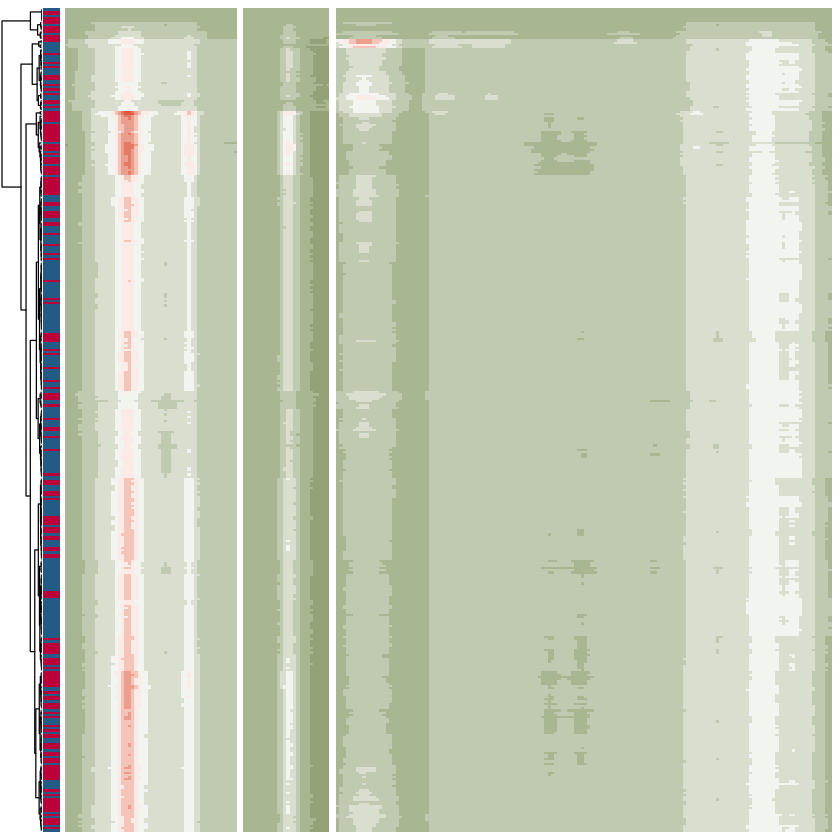

In [10]:
met <- spc[!is.na(spc$dim_met) & is.na(spc$dim_mast) & is.na(spc$dim_ket) & is.na(spc$dim_da) & spc$disease_in <= 7 & spc$dim >= 1, ]
met_filtered <- met[, which(as.numeric(colnames(met)) > 1000 & as.numeric(colnames(met)) < 3000)]
met_filtered <- met_filtered[, which(as.numeric(colnames(met_filtered)) < 1580 | as.numeric(colnames(met_filtered)) > 1700)]
met_filtered <- met_filtered[, which(as.numeric(colnames(met_filtered)) > 2800 | as.numeric(colnames(met_filtered)) < 1800)]
met_filtered <- met_filtered[, ncol(met_filtered):1]

mast <- spc[!is.na(spc$dim_mast) & is.na(spc$dim_met) & is.na(spc$dim_ket) & is.na(spc$dim_da) & spc$disease_in <= 7 & spc$dim >= 1, ]
mast_filtered <- mast[, which(as.numeric(colnames(mast)) > 1000 & as.numeric(colnames(mast)) < 3000)]
mast_filtered <- mast_filtered[, which(as.numeric(colnames(mast_filtered)) < 1580 | as.numeric(colnames(mast_filtered)) > 1700)]
mast_filtered <- mast_filtered[, which(as.numeric(colnames(mast_filtered)) > 2800 | as.numeric(colnames(mast_filtered)) < 1800)]
mast_filtered <- mast_filtered[, ncol(mast_filtered):1]

mast_met <- rbind(met_filtered, mast_filtered)

my_col <- data.frame(group = c(rep('met', dim(met_filtered)[1]), rep('mast', dim(mast_filtered)[1])))
rownames(my_col) <- rownames(mast_met)
col_colors <- list(group = c(met = "#c9184a", mast = "#2a6f97"))

options(repr.plot.width=7, repr.plot.height=7)
pheatmap(mast_met, legend = FALSE, annotation_legend = FALSE, annotation_names_row = FALSE, color=colorRampPalette(c("#a3b18a", "white", "#e76f51"))(10), gaps_col = c(52, 78), annotation_row = my_col, annotation_colors = col_colors, cluster_cols = FALSE, clustering_distance_rows = 'euclidean', clustering_method = 'ward.D2', treeheight_row = 20, show_colnames = FALSE, show_rownames = FALSE)

#### Figure 5B

Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Scale for x is already present.
Adding another scale for x, which will replace the existing scale.


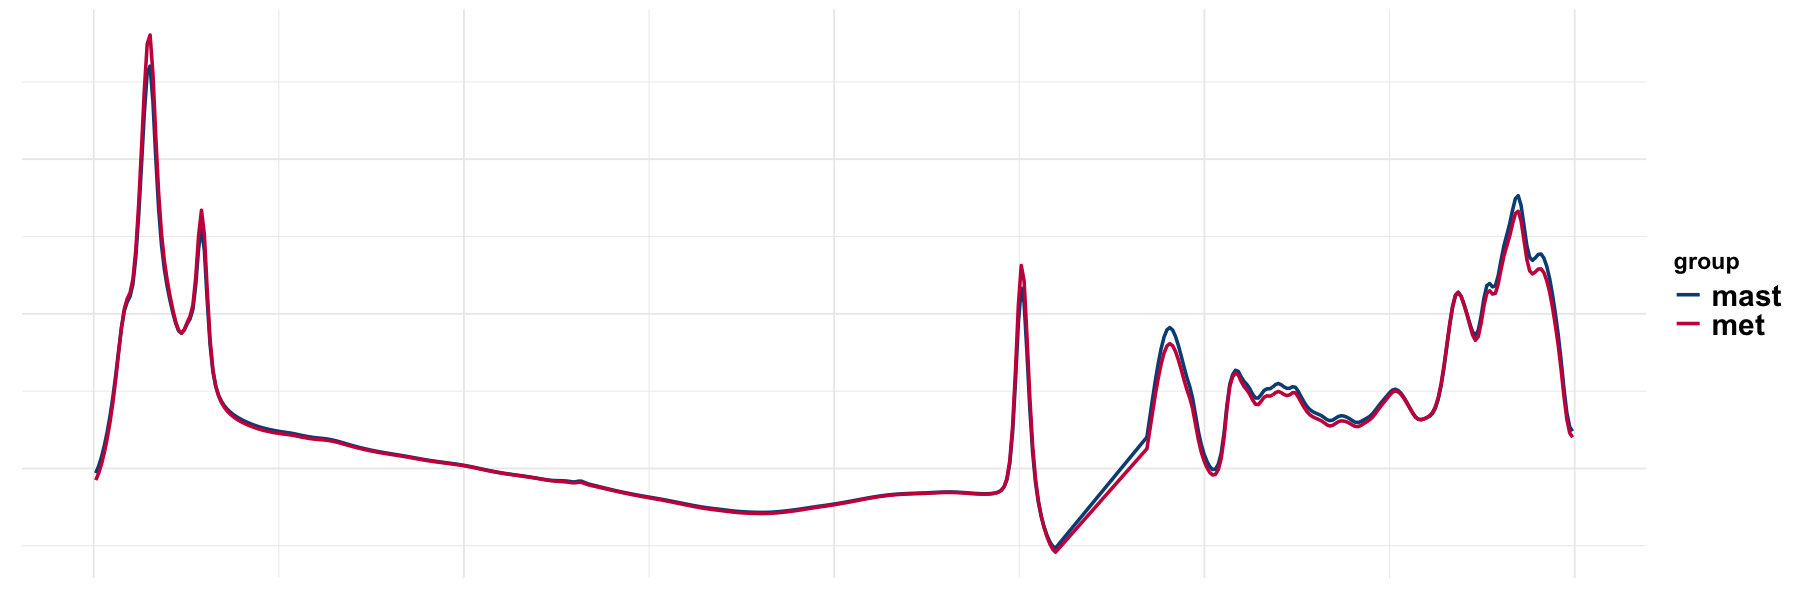

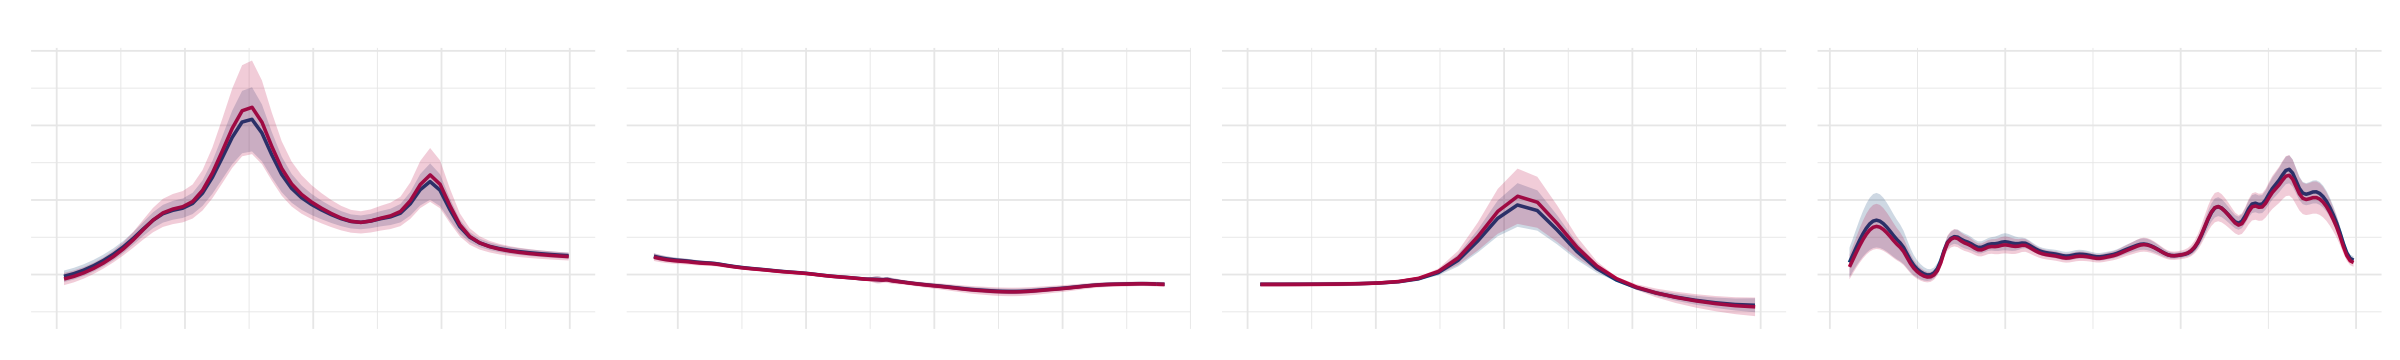

In [15]:
options(repr.plot.width=15, repr.plot.height=5)
pd <- position_dodge(0.1)
ggplot(spc_h, aes(x=wavenum, y=absorbance, color = group)) + 
    geom_line(position=pd, size = 1) +
    scale_x_reverse() +
    theme_minimal() + 
    theme(strip.text = element_text(size=20),
    axis.text.y = element_text(colour = "black", size = 0, face = "bold"), 
    axis.text.x = element_text(colour = "black", face = "bold", size = 0), 
    legend.text = element_text(size = 18, face ="bold", colour ="black"), 
    legend.position = "right", 
    axis.title.y = element_text(face = "bold", size = 0), 
    axis.title.x = element_text(face = "bold", size = 0, colour = "black"), 
    legend.title = element_text(size = 14, colour = "black", face = "bold"), 
    panel.background = element_blank(), 
    panel.border = element_rect(colour = "black", fill = NA, size = 0),
    legend.key=element_blank()) +
    scale_color_manual(values=c("#014f86", "#c9184a"))

p1 <- ggplot(spc_h, aes(x=wavenum, y=absorbance, ymin = absorbance - sds, ymax = absorbance + sds, fill = group)) + 
    geom_line(aes(color = group), position=pd, size = 1) +
    geom_ribbon(alpha = .2) +
    scale_color_manual(values=c("#014f86", "#c9184a")) +
    scale_fill_manual(values=c("#014f86", "#c9184a")) +
    labs(x = 'Wavenumber', y = 'Absorbance', title = "") +
    scale_x_reverse() +
    xlim(1585, 1000) +
    main_theme +
  theme(
    axis.text.y = element_text(colour = "black", size = 0, face = "bold"), 
    axis.text.x = element_text(colour = "black", face = "bold", size = 0))

p2 <- ggplot(spc_h, aes(x=wavenum, y=absorbance, ymin = absorbance - sds, ymax = absorbance + sds, fill = group)) + 
    geom_line(aes(color = group), position=pd, size = 1) +
    geom_ribbon(alpha = .2) +
    scale_color_manual(values=c("#014f86", "#c9184a")) +
    scale_fill_manual(values=c("#014f86", "#c9184a")) +
    labs(x = 'Wavenumber', y = 'Absorbance', title = "") +
    scale_x_reverse() +
    xlim(1800, 1700) +
    main_theme +
  theme(
    axis.text.y = element_text(colour = "black", size = 0, face = "bold"), 
    axis.text.x = element_text(colour = "black", face = "bold", size = 0))

p3 <- ggplot(spc_h, aes(x=wavenum, y=absorbance, ymin = absorbance - sds, ymax = absorbance + sds, fill = group)) + 
    geom_line(aes(color = group), position=pd, size = 1) +
    geom_ribbon(alpha = .2) +
    scale_color_manual(values=c("#014f86", "#c9184a")) +
    scale_fill_manual(values=c("#014f86", "#c9184a")) +
    labs(x = 'Wavenumber', y = 'Absorbance', title = "") +
    scale_x_reverse() +
    xlim(3000, 2800) +
    main_theme +
  theme(
    axis.text.y = element_text(colour = "black", size = 0, face = "bold"), 
    axis.text.x = element_text(colour = "black", face = "bold", size = 0))

p4 <- ggplot(spc_h, aes(x=wavenum, y=absorbance, ymin = absorbance - sds, ymax = absorbance + sds, fill = group)) + 
    geom_line(aes(color = group), position=pd, size = 1) +
    geom_ribbon(alpha = .2) +
    scale_color_manual(values=c("#014f86", "#c9184a")) +
    scale_fill_manual(values=c("#014f86", "#c9184a")) +
    labs(x = 'Wavenumber', y = 'Absorbance', title = "") +
    scale_x_reverse() +
    xlim(2800, 1800) +
    main_theme +
  theme(
    axis.text.y = element_text(colour = "black", size = 0, face = "bold"), 
    axis.text.x = element_text(colour = "black", face = "bold", size = 0))

options(repr.plot.width=20, repr.plot.height=3)
p3 + p4 + p2 + p1 + plot_layout(nrow = 1)


	Wilcoxon rank sum exact test

data:  absorbance by group
W = 12284, p-value = 0.0001166
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon rank sum exact test

data:  absorbance by group
W = 12362, p-value = 7.144e-05
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon rank sum exact test

data:  absorbance by group
W = 12108, p-value = 0.0003348
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon rank sum exact test

data:  absorbance by group
W = 8391, p-value = 0.0527
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon rank sum exact test

data:  absorbance by group
W = 5558, p-value = 3.885e-10
alternative hypothesis: true location shift is not equal to 0


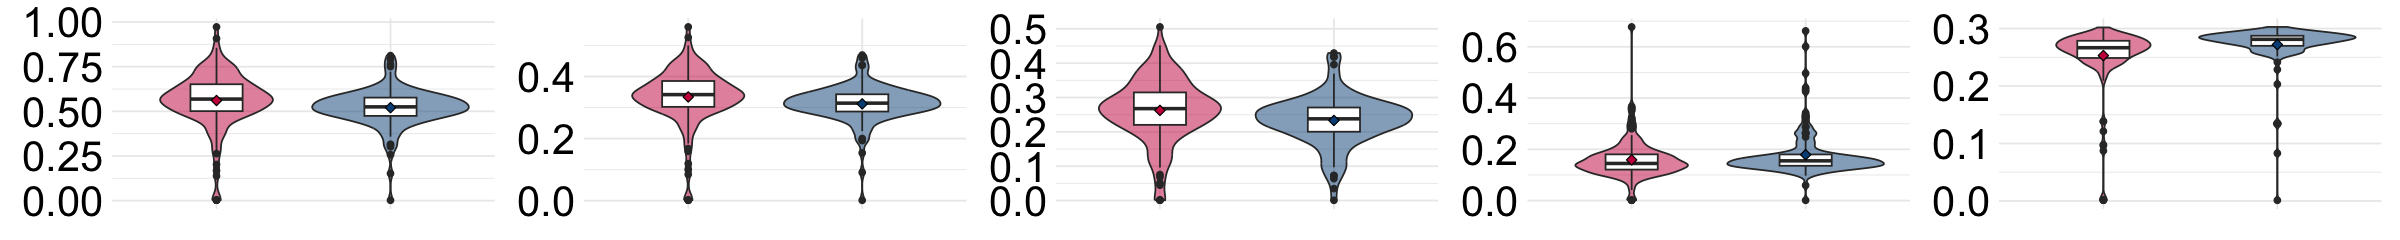

In [39]:
met <- spc[!is.na(spc$dim_met) & is.na(spc$dim_mast) & is.na(spc$dim_ket) & is.na(spc$dim_da) & spc$disease_in <= 7 & spc$dim <= 7 & spc$dim >= 1, ]
met_filtered <- met[, which(as.numeric(colnames(met)) > 1000 & as.numeric(colnames(met)) < 3000)]

mast <- spc[!is.na(spc$dim_mast) & is.na(spc$dim_met) & is.na(spc$dim_ket) & is.na(spc$dim_da) & spc$disease_in <= 7 & spc$dim <= 7 & spc$dim >= 1, ]
mast_filtered <- mast[, which(as.numeric(colnames(mast)) > 1000 & as.numeric(colnames(mast)) < 3000)]

r11 <- c(met_filtered[['2923.87']], mast_filtered[['2923.87']])
dim <- c(met[['dim']], mast[['dim']])
disease_in <- c(met[['disease_in']], mast[['disease_in']])
group <- c(rep('met', length(met_filtered[['2923.87']])), rep('mast', length(mast_filtered[['2923.87']])))
r11 <- data.frame(absorbance = r11, group = group, dim = dim, disease_in = disease_in)
r11$dim <- sapply(r11$dim, function(x) ifelse(x >= 5, '≥5', x))
r11$disease_in <- sapply(r11$disease_in, function(x) ifelse(x >= 5, '≥5', x))
r11$group <- factor(r11$group, levels=c("met", "mast"))
p1 <- ggplot(r11, aes(group, absorbance, fill=group)) + 
   geom_violin(alpha=0.5) +
  geom_boxplot(width=0.3, fill="white") +
  stat_summary(fun.y=mean, geom="point", shape=23, size=2) + 
  scale_fill_manual(values=c("met" = "#c9184a", "mast" = "#014f86")) +
  theme_minimal() + 
    theme(strip.text = element_text(size=20),
    axis.text.y = element_text(colour = "black", size = 25), 
    axis.text.x = element_text(colour = "black", face = "bold", size = 0), 
    legend.text = element_text(size = 18, face ="bold", colour ="black"), 
    legend.position = "none", 
    axis.title.y = element_text(face = "bold", size = 0), 
    axis.title.x = element_text(face = "bold", size = 0, colour = "black"), 
    legend.title = element_text(size = 14, colour = "black", face = "bold"), 
    panel.background = element_blank(), 
    panel.border = element_rect(colour = "black", fill = NA, size = 0),
    legend.key=element_blank())
wilcox.test(absorbance ~ group, exact=TRUE, data=r11) 

r12 <- c(met_filtered[['2854.44']], mast_filtered[['2854.44']])
dim <- c(met[['dim']], mast[['dim']])
disease_in <- c(met[['disease_in']], mast[['disease_in']])
group <- c(rep('met', length(met_filtered[['2854.44']])), rep('mast', length(mast_filtered[['2854.44']])))
r12 <- data.frame(absorbance = r12, group = group, dim = dim, disease_in = disease_in)
r12$dim <- sapply(r12$dim, function(x) ifelse(x >= 5, '≥5', x))
r12$disease_in <- sapply(r12$disease_in, function(x) ifelse(x >= 5, '≥5', x))
r12$group <- factor(r12$group, levels=c("met", "mast"))
p2 <- ggplot(r12, aes(group, absorbance, fill=group)) + 
   geom_violin(alpha=0.5) +
  geom_boxplot(width=0.3, fill="white") +
  stat_summary(fun.y=mean, geom="point", shape=23, size=2) + 
  scale_fill_manual(values=c("met" = "#c9184a", "mast" = "#014f86")) + 
  theme_minimal() + 
    theme(strip.text = element_text(size=20),
    axis.text.y = element_text(colour = "black", size = 25), 
    axis.text.x = element_text(colour = "black", face = "bold", size = 0), 
    legend.text = element_text(size = 18, face ="bold", colour ="black"), 
    legend.position = "none", 
    axis.title.y = element_text(face = "bold", size = 0), 
    axis.title.x = element_text(face = "bold", size = 0, colour = "black"), 
    legend.title = element_text(size = 14, colour = "black", face = "bold"), 
    panel.background = element_blank(), 
    panel.border = element_rect(colour = "black", fill = NA, size = 0),
    legend.key=element_blank())
wilcox.test(absorbance ~ group, exact=TRUE, data=r12) 

r2 <- c(met_filtered[['1747.38']], mast_filtered[['1747.38']])
dim <- c(met[['dim']], mast[['dim']])
disease_in <- c(met[['disease_in']], mast[['disease_in']])
group <- c(rep('met', length(met_filtered[['1747.38']])), rep('mast', length(mast_filtered[['1747.38']])))
r2 <- data.frame(absorbance = r2, group = group, dim = dim, disease_in = disease_in)
r2$dim <- sapply(r2$dim, function(x) ifelse(x >= 5, '≥5', x))
r2$disease_in <- sapply(r2$disease_in, function(x) ifelse(x >= 5, '≥5', x))
r2$group <- factor(r2$group, levels=c("met", "mast"))
p3 <- ggplot(r2, aes(group, absorbance, fill=group)) + 
   geom_violin(alpha=0.5) +
  geom_boxplot(width=0.3, fill="white") +
  stat_summary(fun.y=mean, geom="point", shape=23, size=2) + 
  scale_fill_manual(values=c("met" = "#c9184a", "mast" = "#014f86")) + 
  theme_minimal() + 
    theme(strip.text = element_text(size=20),
    axis.text.y = element_text(colour = "black", size = 25), 
    axis.text.x = element_text(colour = "black", face = "bold", size = 0), 
    legend.text = element_text(size = 18, face ="bold", colour ="black"), 
    legend.position = "none", 
    axis.title.y = element_text(face = "bold", size = 0), 
    axis.title.x = element_text(face = "bold", size = 0, colour = "black"), 
    legend.title = element_text(size = 14, colour = "black", face = "bold"), 
    panel.background = element_blank(), 
    panel.border = element_rect(colour = "black", fill = NA, size = 0),
    legend.key=element_blank())
wilcox.test(absorbance ~ group, exact=TRUE, data=r2) 

r31 <- c(met_filtered[['1542.94']], mast_filtered[['1542.94']])
dim <- c(met[['dim']], mast[['dim']])
disease_in <- c(met[['disease_in']], mast[['disease_in']])
group <- c(rep('met', length(met_filtered[['1542.94']])), rep('mast', length(mast_filtered[['1542.94']])))
r31 <- data.frame(absorbance = r31, group = group, dim = dim, disease_in = disease_in)
r31$dim <- sapply(r31$dim, function(x) ifelse(x >= 5, '≥5', x))
r31$disease_in <- sapply(r31$disease_in, function(x) ifelse(x >= 5, '≥5', x))
r31$group <- factor(r31$group, levels=c("met", "mast"))
p4 <- ggplot(r31, aes(group, absorbance, fill=group)) + 
   geom_violin(alpha=0.5) +
  geom_boxplot(width=0.3, fill="white") +
  stat_summary(fun.y=mean, geom="point", shape=23, size=2) + 
  scale_fill_manual(values=c("met" = "#c9184a", "mast" = "#014f86")) + 
  theme_minimal() + 
    theme(strip.text = element_text(size=20),
    axis.text.y = element_text(colour = "black", size = 25), 
    axis.text.x = element_text(colour = "black", face = "bold", size = 0), 
    legend.text = element_text(size = 18, face ="bold", colour ="black"), 
    legend.position = "none", 
    axis.title.y = element_text(face = "bold", size = 0), 
    axis.title.x = element_text(face = "bold", size = 0, colour = "black"), 
    legend.title = element_text(size = 14, colour = "black", face = "bold"), 
    panel.background = element_blank(), 
    panel.border = element_rect(colour = "black", fill = NA, size = 0),
    legend.key=element_blank())
wilcox.test(absorbance ~ group, exact=TRUE, data=r31) 

r32 <- c(met_filtered[['1041.48']], mast_filtered[['1041.48']])
dim <- c(met[['dim']], mast[['dim']])
disease_in <- c(met[['disease_in']], mast[['disease_in']])
group <- c(rep('met', length(met_filtered[['1041.48']])), rep('mast', length(mast_filtered[['1041.48']])))
r32 <- data.frame(absorbance = r32, group = group, dim = dim, disease_in = disease_in)
r32$dim <- sapply(r32$dim, function(x) ifelse(x >= 5, '≥5', x))
r32$disease_in <- sapply(r32$disease_in, function(x) ifelse(x >= 5, '≥5', x))
r32$group <- factor(r32$group, levels=c("met", "mast"))
p5 <- ggplot(r32, aes(group, absorbance, fill=group)) + 
   geom_violin(alpha=0.5) +
  geom_boxplot(width=0.3, fill="white") +
  stat_summary(fun.y=mean, geom="point", shape=23, size=2) + 
  scale_fill_manual(values=c("met" = "#c9184a", "mast" = "#014f86")) + 
  theme_minimal() + 
    theme(strip.text = element_text(size=20),
    axis.text.y = element_text(colour = "black", size = 25), 
    axis.text.x = element_text(colour = "black", face = "bold", size = 0), 
    legend.text = element_text(size = 18, face ="bold", colour ="black"), 
    legend.position = "none", 
    axis.title.y = element_text(face = "bold", size = 0), 
    axis.title.x = element_text(face = "bold", size = 0, colour = "black"), 
    legend.title = element_text(size = 14, colour = "black", face = "bold"), 
    panel.background = element_blank(), 
    panel.border = element_rect(colour = "black", fill = NA, size = 0),
    legend.key=element_blank())
wilcox.test(absorbance ~ group, exact=TRUE, data=r32) 

options(repr.plot.width=20, repr.plot.height=2)
p1 + p2 + p3 + p4 + p5 + plot_layout(nrow = 1)

In [31]:
r11 %>%
  filter(dim == 1) %>%
  group_by(group) %>%
  summarise(data = list(absorbance)) %>%
  summarise(wilcox = list(wilcox.test(data[[1]], data[[2]], exact = FALSE))) %>%
  pull(wilcox)

r11 %>%
  filter(dim == 2) %>%
  group_by(group) %>%
  summarise(data = list(absorbance)) %>%
  summarise(wilcox = list(wilcox.test(data[[1]], data[[2]], exact = FALSE))) %>%
  pull(wilcox)

r11 %>%
  filter(dim == 3) %>%
  group_by(group) %>%
  summarise(data = list(absorbance)) %>%
  summarise(wilcox = list(wilcox.test(data[[1]], data[[2]], exact = FALSE))) %>%
  pull(wilcox)

r11 %>%
  filter(dim == 4) %>%
  group_by(group) %>%
  summarise(data = list(absorbance)) %>%
  summarise(wilcox = list(wilcox.test(data[[1]], data[[2]], exact = FALSE))) %>%
  pull(wilcox)

r11 %>%
  filter(dim == '≥5') %>%
  group_by(group) %>%
  summarise(data = list(absorbance)) %>%
  summarise(wilcox = list(wilcox.test(data[[1]], data[[2]], exact = FALSE))) %>%
  pull(wilcox)

[[1]]

	Wilcoxon rank sum test with continuity correction

data:  data[[1]] and data[[2]]
W = 227, p-value = 0.5287
alternative hypothesis: true location shift is not equal to 0



[[1]]

	Wilcoxon rank sum test with continuity correction

data:  data[[1]] and data[[2]]
W = 552, p-value = 0.009287
alternative hypothesis: true location shift is not equal to 0



[[1]]

	Wilcoxon rank sum test with continuity correction

data:  data[[1]] and data[[2]]
W = 322, p-value = 0.09892
alternative hypothesis: true location shift is not equal to 0



[[1]]

	Wilcoxon rank sum test with continuity correction

data:  data[[1]] and data[[2]]
W = 299, p-value = 0.02754
alternative hypothesis: true location shift is not equal to 0



[[1]]

	Wilcoxon rank sum test with continuity correction

data:  data[[1]] and data[[2]]
W = 1139, p-value = 0.06846
alternative hypothesis: true location shift is not equal to 0



In [32]:
r12 %>%
  filter(dim == 1) %>%
  group_by(group) %>%
  summarise(data = list(absorbance)) %>%
  summarise(wilcox = list(wilcox.test(data[[1]], data[[2]], exact = FALSE))) %>%
  pull(wilcox)

r12 %>%
  filter(dim == 2) %>%
  group_by(group) %>%
  summarise(data = list(absorbance)) %>%
  summarise(wilcox = list(wilcox.test(data[[1]], data[[2]], exact = FALSE))) %>%
  pull(wilcox)

r12 %>%
  filter(dim == 3) %>%
  group_by(group) %>%
  summarise(data = list(absorbance)) %>%
  summarise(wilcox = list(wilcox.test(data[[1]], data[[2]], exact = FALSE))) %>%
  pull(wilcox)

r12 %>%
  filter(dim == 4) %>%
  group_by(group) %>%
  summarise(data = list(absorbance)) %>%
  summarise(wilcox = list(wilcox.test(data[[1]], data[[2]], exact = FALSE))) %>%
  pull(wilcox)

r12 %>%
  filter(dim == '≥5') %>%
  group_by(group) %>%
  summarise(data = list(absorbance)) %>%
  summarise(wilcox = list(wilcox.test(data[[1]], data[[2]], exact = FALSE))) %>%
  pull(wilcox)

[[1]]

	Wilcoxon rank sum test with continuity correction

data:  data[[1]] and data[[2]]
W = 230, p-value = 0.4785
alternative hypothesis: true location shift is not equal to 0



[[1]]

	Wilcoxon rank sum test with continuity correction

data:  data[[1]] and data[[2]]
W = 553, p-value = 0.008868
alternative hypothesis: true location shift is not equal to 0



[[1]]

	Wilcoxon rank sum test with continuity correction

data:  data[[1]] and data[[2]]
W = 317, p-value = 0.1241
alternative hypothesis: true location shift is not equal to 0



[[1]]

	Wilcoxon rank sum test with continuity correction

data:  data[[1]] and data[[2]]
W = 297, p-value = 0.03136
alternative hypothesis: true location shift is not equal to 0



[[1]]

	Wilcoxon rank sum test with continuity correction

data:  data[[1]] and data[[2]]
W = 1160, p-value = 0.04546
alternative hypothesis: true location shift is not equal to 0



In [33]:
r2 %>%
  filter(dim == 1) %>%
  group_by(group) %>%
  summarise(data = list(absorbance)) %>%
  summarise(wilcox = list(wilcox.test(data[[1]], data[[2]], exact = FALSE))) %>%
  pull(wilcox)

r2 %>%
  filter(dim == 2) %>%
  group_by(group) %>%
  summarise(data = list(absorbance)) %>%
  summarise(wilcox = list(wilcox.test(data[[1]], data[[2]], exact = FALSE))) %>%
  pull(wilcox)

r2 %>%
  filter(dim == 3) %>%
  group_by(group) %>%
  summarise(data = list(absorbance)) %>%
  summarise(wilcox = list(wilcox.test(data[[1]], data[[2]], exact = FALSE))) %>%
  pull(wilcox)

r2 %>%
  filter(dim == 4) %>%
  group_by(group) %>%
  summarise(data = list(absorbance)) %>%
  summarise(wilcox = list(wilcox.test(data[[1]], data[[2]], exact = FALSE))) %>%
  pull(wilcox)

r2 %>%
  filter(dim == '≥5') %>%
  group_by(group) %>%
  summarise(data = list(absorbance)) %>%
  summarise(wilcox = list(wilcox.test(data[[1]], data[[2]], exact = FALSE))) %>%
  pull(wilcox)

[[1]]

	Wilcoxon rank sum test with continuity correction

data:  data[[1]] and data[[2]]
W = 239, p-value = 0.3447
alternative hypothesis: true location shift is not equal to 0



[[1]]

	Wilcoxon rank sum test with continuity correction

data:  data[[1]] and data[[2]]
W = 551, p-value = 0.009724
alternative hypothesis: true location shift is not equal to 0



[[1]]

	Wilcoxon rank sum test with continuity correction

data:  data[[1]] and data[[2]]
W = 317, p-value = 0.1241
alternative hypothesis: true location shift is not equal to 0



[[1]]

	Wilcoxon rank sum test with continuity correction

data:  data[[1]] and data[[2]]
W = 292, p-value = 0.04293
alternative hypothesis: true location shift is not equal to 0



[[1]]

	Wilcoxon rank sum test with continuity correction

data:  data[[1]] and data[[2]]
W = 1124, p-value = 0.09016
alternative hypothesis: true location shift is not equal to 0



In [34]:
r31 %>%
  filter(dim == 1) %>%
  group_by(group) %>%
  summarise(data = list(absorbance)) %>%
  summarise(wilcox = list(wilcox.test(data[[1]], data[[2]], exact = FALSE))) %>%
  pull(wilcox)

r31 %>%
  filter(dim == 2) %>%
  group_by(group) %>%
  summarise(data = list(absorbance)) %>%
  summarise(wilcox = list(wilcox.test(data[[1]], data[[2]], exact = FALSE))) %>%
  pull(wilcox)

r31 %>%
  filter(dim == 3) %>%
  group_by(group) %>%
  summarise(data = list(absorbance)) %>%
  summarise(wilcox = list(wilcox.test(data[[1]], data[[2]], exact = FALSE))) %>%
  pull(wilcox)

r31 %>%
  filter(dim == 4) %>%
  group_by(group) %>%
  summarise(data = list(absorbance)) %>%
  summarise(wilcox = list(wilcox.test(data[[1]], data[[2]], exact = FALSE))) %>%
  pull(wilcox)

r31 %>%
  filter(dim == '≥5') %>%
  group_by(group) %>%
  summarise(data = list(absorbance)) %>%
  summarise(wilcox = list(wilcox.test(data[[1]], data[[2]], exact = FALSE))) %>%
  pull(wilcox)

[[1]]

	Wilcoxon rank sum test with continuity correction

data:  data[[1]] and data[[2]]
W = 143, p-value = 0.1214
alternative hypothesis: true location shift is not equal to 0



[[1]]

	Wilcoxon rank sum test with continuity correction

data:  data[[1]] and data[[2]]
W = 259, p-value = 0.04378
alternative hypothesis: true location shift is not equal to 0



[[1]]

	Wilcoxon rank sum test with continuity correction

data:  data[[1]] and data[[2]]
W = 159, p-value = 0.04694
alternative hypothesis: true location shift is not equal to 0



[[1]]

	Wilcoxon rank sum test with continuity correction

data:  data[[1]] and data[[2]]
W = 108, p-value = 0.007699
alternative hypothesis: true location shift is not equal to 0



[[1]]

	Wilcoxon rank sum test with continuity correction

data:  data[[1]] and data[[2]]
W = 451, p-value = 5.983e-05
alternative hypothesis: true location shift is not equal to 0



In [35]:
r32 %>%
  filter(dim == 1) %>%
  group_by(group) %>%
  summarise(data = list(absorbance)) %>%
  summarise(wilcox = list(wilcox.test(data[[1]], data[[2]], exact = FALSE))) %>%
  pull(wilcox)

r32 %>%
  filter(dim == 2) %>%
  group_by(group) %>%
  summarise(data = list(absorbance)) %>%
  summarise(wilcox = list(wilcox.test(data[[1]], data[[2]], exact = FALSE))) %>%
  pull(wilcox)

r32 %>%
  filter(dim == 3) %>%
  group_by(group) %>%
  summarise(data = list(absorbance)) %>%
  summarise(wilcox = list(wilcox.test(data[[1]], data[[2]], exact = FALSE))) %>%
  pull(wilcox)

r32 %>%
  filter(dim == 4) %>%
  group_by(group) %>%
  summarise(data = list(absorbance)) %>%
  summarise(wilcox = list(wilcox.test(data[[1]], data[[2]], exact = FALSE))) %>%
  pull(wilcox)

r32 %>%
  filter(dim == '≥5') %>%
  group_by(group) %>%
  summarise(data = list(absorbance)) %>%
  summarise(wilcox = list(wilcox.test(data[[1]], data[[2]], exact = FALSE))) %>%
  pull(wilcox)

[[1]]

	Wilcoxon rank sum test with continuity correction

data:  data[[1]] and data[[2]]
W = 221, p-value = 0.6366
alternative hypothesis: true location shift is not equal to 0



[[1]]

	Wilcoxon rank sum test with continuity correction

data:  data[[1]] and data[[2]]
W = 224, p-value = 0.01018
alternative hypothesis: true location shift is not equal to 0



[[1]]

	Wilcoxon rank sum test with continuity correction

data:  data[[1]] and data[[2]]
W = 113, p-value = 0.002531
alternative hypothesis: true location shift is not equal to 0



[[1]]

	Wilcoxon rank sum test with continuity correction

data:  data[[1]] and data[[2]]
W = 114, p-value = 0.01203
alternative hypothesis: true location shift is not equal to 0



[[1]]

	Wilcoxon rank sum test with continuity correction

data:  data[[1]] and data[[2]]
W = 568, p-value = 0.002531
alternative hypothesis: true location shift is not equal to 0



In [47]:
r11 %>%
  filter(disease_in == '≥5') %>%
  group_by(group) %>%
  summarise(data = list(absorbance)) %>%
  summarise(wilcox = list(wilcox.test(data[[1]], data[[2]], exact = FALSE))) %>%
  pull(wilcox)

r11 %>%
  filter(disease_in == 4) %>%
  group_by(group) %>%
  summarise(data = list(absorbance)) %>%
  summarise(wilcox = list(wilcox.test(data[[1]], data[[2]], exact = FALSE))) %>%
  pull(wilcox)

r11 %>%
  filter(disease_in == 3) %>%
  group_by(group) %>%
  summarise(data = list(absorbance)) %>%
  summarise(wilcox = list(wilcox.test(data[[1]], data[[2]], exact = FALSE))) %>%
  pull(wilcox)

r11 %>%
  filter(disease_in == 2) %>%
  group_by(group) %>%
  summarise(data = list(absorbance)) %>%
  summarise(wilcox = list(wilcox.test(data[[1]], data[[2]], exact = FALSE))) %>%
  pull(wilcox)

r11 %>%
  filter(disease_in == 0) %>%
  group_by(group) %>%
  summarise(data = list(absorbance)) %>%
  summarise(wilcox = list(wilcox.test(data[[1]], data[[2]], exact = FALSE))) %>%
  pull(wilcox)

[[1]]

	Wilcoxon rank sum test with continuity correction

data:  data[[1]] and data[[2]]
W = 476, p-value = 0.5116
alternative hypothesis: true location shift is not equal to 0



[[1]]

	Wilcoxon rank sum test with continuity correction

data:  data[[1]] and data[[2]]
W = 169, p-value = 0.7867
alternative hypothesis: true location shift is not equal to 0



[[1]]

	Wilcoxon rank sum test with continuity correction

data:  data[[1]] and data[[2]]
W = 281, p-value = 0.4391
alternative hypothesis: true location shift is not equal to 0



[[1]]

	Wilcoxon rank sum test with continuity correction

data:  data[[1]] and data[[2]]
W = 326, p-value = 0.007885
alternative hypothesis: true location shift is not equal to 0



[[1]]

	Wilcoxon rank sum test with continuity correction

data:  data[[1]] and data[[2]]
W = 339, p-value = 0.006281
alternative hypothesis: true location shift is not equal to 0



In [48]:
r12 %>%
  filter(disease_in == '≥5') %>%
  group_by(group) %>%
  summarise(data = list(absorbance)) %>%
  summarise(wilcox = list(wilcox.test(data[[1]], data[[2]], exact = FALSE))) %>%
  pull(wilcox)

r12 %>%
  filter(disease_in == 4) %>%
  group_by(group) %>%
  summarise(data = list(absorbance)) %>%
  summarise(wilcox = list(wilcox.test(data[[1]], data[[2]], exact = FALSE))) %>%
  pull(wilcox)

r12 %>%
  filter(disease_in == 3) %>%
  group_by(group) %>%
  summarise(data = list(absorbance)) %>%
  summarise(wilcox = list(wilcox.test(data[[1]], data[[2]], exact = FALSE))) %>%
  pull(wilcox)

r12 %>%
  filter(disease_in == 2) %>%
  group_by(group) %>%
  summarise(data = list(absorbance)) %>%
  summarise(wilcox = list(wilcox.test(data[[1]], data[[2]], exact = FALSE))) %>%
  pull(wilcox)

r12 %>%
  filter(disease_in == 0) %>%
  group_by(group) %>%
  summarise(data = list(absorbance)) %>%
  summarise(wilcox = list(wilcox.test(data[[1]], data[[2]], exact = FALSE))) %>%
  pull(wilcox)

[[1]]

	Wilcoxon rank sum test with continuity correction

data:  data[[1]] and data[[2]]
W = 482, p-value = 0.4551
alternative hypothesis: true location shift is not equal to 0



[[1]]

	Wilcoxon rank sum test with continuity correction

data:  data[[1]] and data[[2]]
W = 168, p-value = 0.8113
alternative hypothesis: true location shift is not equal to 0



[[1]]

	Wilcoxon rank sum test with continuity correction

data:  data[[1]] and data[[2]]
W = 282, p-value = 0.4257
alternative hypothesis: true location shift is not equal to 0



[[1]]

	Wilcoxon rank sum test with continuity correction

data:  data[[1]] and data[[2]]
W = 329, p-value = 0.006286
alternative hypothesis: true location shift is not equal to 0



[[1]]

	Wilcoxon rank sum test with continuity correction

data:  data[[1]] and data[[2]]
W = 344, p-value = 0.004329
alternative hypothesis: true location shift is not equal to 0



In [49]:
r2 %>%
  filter(disease_in == '≥5') %>%
  group_by(group) %>%
  summarise(data = list(absorbance)) %>%
  summarise(wilcox = list(wilcox.test(data[[1]], data[[2]], exact = FALSE))) %>%
  pull(wilcox)

r2 %>%
  filter(disease_in == 4) %>%
  group_by(group) %>%
  summarise(data = list(absorbance)) %>%
  summarise(wilcox = list(wilcox.test(data[[1]], data[[2]], exact = FALSE))) %>%
  pull(wilcox)

r2 %>%
  filter(disease_in == 3) %>%
  group_by(group) %>%
  summarise(data = list(absorbance)) %>%
  summarise(wilcox = list(wilcox.test(data[[1]], data[[2]], exact = FALSE))) %>%
  pull(wilcox)

r2 %>%
  filter(disease_in == 2) %>%
  group_by(group) %>%
  summarise(data = list(absorbance)) %>%
  summarise(wilcox = list(wilcox.test(data[[1]], data[[2]], exact = FALSE))) %>%
  pull(wilcox)

r2 %>%
  filter(disease_in == 0) %>%
  group_by(group) %>%
  summarise(data = list(absorbance)) %>%
  summarise(wilcox = list(wilcox.test(data[[1]], data[[2]], exact = FALSE))) %>%
  pull(wilcox)

[[1]]

	Wilcoxon rank sum test with continuity correction

data:  data[[1]] and data[[2]]
W = 461, p-value = 0.6672
alternative hypothesis: true location shift is not equal to 0



[[1]]

	Wilcoxon rank sum test with continuity correction

data:  data[[1]] and data[[2]]
W = 160, p-value = 1
alternative hypothesis: true location shift is not equal to 0



[[1]]

	Wilcoxon rank sum test with continuity correction

data:  data[[1]] and data[[2]]
W = 279, p-value = 0.4665
alternative hypothesis: true location shift is not equal to 0



[[1]]

	Wilcoxon rank sum test with continuity correction

data:  data[[1]] and data[[2]]
W = 320, p-value = 0.01222
alternative hypothesis: true location shift is not equal to 0



[[1]]

	Wilcoxon rank sum test with continuity correction

data:  data[[1]] and data[[2]]
W = 334, p-value = 0.008992
alternative hypothesis: true location shift is not equal to 0



In [50]:
r31 %>%
  filter(disease_in == '≥5') %>%
  group_by(group) %>%
  summarise(data = list(absorbance)) %>%
  summarise(wilcox = list(wilcox.test(data[[1]], data[[2]], exact = FALSE))) %>%
  pull(wilcox)

r31 %>%
  filter(disease_in == 4) %>%
  group_by(group) %>%
  summarise(data = list(absorbance)) %>%
  summarise(wilcox = list(wilcox.test(data[[1]], data[[2]], exact = FALSE))) %>%
  pull(wilcox)

r31 %>%
  filter(disease_in == 3) %>%
  group_by(group) %>%
  summarise(data = list(absorbance)) %>%
  summarise(wilcox = list(wilcox.test(data[[1]], data[[2]], exact = FALSE))) %>%
  pull(wilcox)

r31 %>%
  filter(disease_in == 2) %>%
  group_by(group) %>%
  summarise(data = list(absorbance)) %>%
  summarise(wilcox = list(wilcox.test(data[[1]], data[[2]], exact = FALSE))) %>%
  pull(wilcox)

r31 %>%
  filter(disease_in == 0) %>%
  group_by(group) %>%
  summarise(data = list(absorbance)) %>%
  summarise(wilcox = list(wilcox.test(data[[1]], data[[2]], exact = FALSE))) %>%
  pull(wilcox)

[[1]]

	Wilcoxon rank sum test with continuity correction

data:  data[[1]] and data[[2]]
W = 471, p-value = 0.5613
alternative hypothesis: true location shift is not equal to 0



[[1]]

	Wilcoxon rank sum test with continuity correction

data:  data[[1]] and data[[2]]
W = 221, p-value = 0.0541
alternative hypothesis: true location shift is not equal to 0



[[1]]

	Wilcoxon rank sum test with continuity correction

data:  data[[1]] and data[[2]]
W = 235, p-value = 0.8023
alternative hypothesis: true location shift is not equal to 0



[[1]]

	Wilcoxon rank sum test with continuity correction

data:  data[[1]] and data[[2]]
W = 178, p-value = 0.296
alternative hypothesis: true location shift is not equal to 0



[[1]]

	Wilcoxon rank sum test with continuity correction

data:  data[[1]] and data[[2]]
W = 101, p-value = 0.002944
alternative hypothesis: true location shift is not equal to 0



In [46]:
r32 %>%
  filter(disease_in == '≥5') %>%
  group_by(group) %>%
  summarise(data = list(absorbance)) %>%
  summarise(wilcox = list(wilcox.test(data[[1]], data[[2]], exact = FALSE))) %>%
  pull(wilcox)

r32 %>%
  filter(disease_in == 4) %>%
  group_by(group) %>%
  summarise(data = list(absorbance)) %>%
  summarise(wilcox = list(wilcox.test(data[[1]], data[[2]], exact = FALSE))) %>%
  pull(wilcox)

r32 %>%
  filter(disease_in == 3) %>%
  group_by(group) %>%
  summarise(data = list(absorbance)) %>%
  summarise(wilcox = list(wilcox.test(data[[1]], data[[2]], exact = FALSE))) %>%
  pull(wilcox)

r32 %>%
  filter(disease_in == 2) %>%
  group_by(group) %>%
  summarise(data = list(absorbance)) %>%
  summarise(wilcox = list(wilcox.test(data[[1]], data[[2]], exact = FALSE))) %>%
  pull(wilcox)

r32 %>%
  filter(disease_in == 1) %>%
  group_by(group) %>%
  summarise(data = list(absorbance)) %>%
  summarise(wilcox = list(wilcox.test(data[[1]], data[[2]], exact = FALSE))) %>%
  pull(wilcox)

[[1]]

	Wilcoxon rank sum test with continuity correction

data:  data[[1]] and data[[2]]
W = 216, p-value = 0.001147
alternative hypothesis: true location shift is not equal to 0



[[1]]

	Wilcoxon rank sum test with continuity correction

data:  data[[1]] and data[[2]]
W = 95, p-value = 0.04003
alternative hypothesis: true location shift is not equal to 0



[[1]]

	Wilcoxon rank sum test with continuity correction

data:  data[[1]] and data[[2]]
W = 105, p-value = 0.001333
alternative hypothesis: true location shift is not equal to 0



[[1]]

	Wilcoxon rank sum test with continuity correction

data:  data[[1]] and data[[2]]
W = 158, p-value = 0.1214
alternative hypothesis: true location shift is not equal to 0



[[1]]

	Wilcoxon rank sum test with continuity correction

data:  data[[1]] and data[[2]]
W = 209, p-value = 0.06344
alternative hypothesis: true location shift is not equal to 0



#### Figure 5C

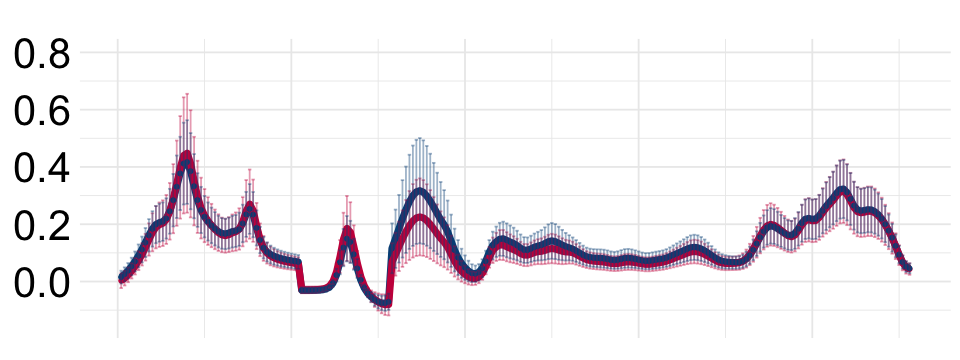

In [13]:
met_1 <- met[met$dim == 1,]
met_filtered <- met_1[, which(as.numeric(colnames(met)) > 1000 & as.numeric(colnames(met)) < 3000)]
met_filtered <- met_filtered[, which(as.numeric(colnames(met_filtered)) < 1580 | as.numeric(colnames(met_filtered)) > 1700)]
met_filtered <- met_filtered[, which(as.numeric(colnames(met_filtered)) > 2800 | as.numeric(colnames(met_filtered)) < 1800)]
met_filtered <- met_filtered[, ncol(met_filtered):1]
met_mean <- colMeans(met_filtered)
met_sd <- apply(met_filtered, 2, sd)
met_group <- rep('met', length(met_mean))

mast_1 <- mast[mast$dim == 1,]
mast_filtered <- mast_1[, which(as.numeric(colnames(mast)) > 1000 & as.numeric(colnames(mast)) < 3000)]
mast_filtered <- mast_filtered[, which(as.numeric(colnames(mast_filtered)) < 1580 | as.numeric(colnames(mast_filtered)) > 1700)]
mast_filtered <- mast_filtered[, which(as.numeric(colnames(mast_filtered)) > 2800 | as.numeric(colnames(mast_filtered)) < 1800)]
mast_filtered <- mast_filtered[, ncol(mast_filtered):1]
mast_mean <- colMeans(mast_filtered)
mast_sd <- apply(mast_filtered, 2, sd)
mast_group <- rep('mast', length(mast_mean))

mean_sd <- data.frame(spc = c(as.numeric(colnames(met_filtered)), as.numeric(colnames(mast_filtered))), mean = c(met_mean, mast_mean), sd = c(met_sd, mast_sd), group = c(met_group, mast_group), rank = c(seq(1, 228), seq(1, 228)))
mean_sd$region <- 'R1'
mean_sd <- mean_sd %>% mutate(region = ifelse(spc > 2810 & spc < 3000, "R1", region))
mean_sd <- mean_sd %>% mutate(region = ifelse(spc > 1700 & spc < 1800, "R2", region))
mean_sd <- mean_sd %>% mutate(region = ifelse(spc > 1000 & spc < 1585, "R3", region))

options(repr.plot.width=8, repr.plot.height=3)
ggplot(mean_sd, aes(x=rank, y=mean, color=group))+
   geom_line(position=pd, size = 2) +
   geom_point(position=pd, size=1) +
   geom_errorbar(aes(ymin=mean-sd, ymax=mean+sd), width=1, alpha = 0.4) +
    scale_color_manual(values=c("#014f86", "#c9184a")) + 
    labs(x = 'Wavenumber', y = 'Absorbance', title = "") +
    ylim(-0.15,  0.8) +
    theme_minimal() +
    theme(
    axis.text.y = element_text(colour = "black", size = 25), 
    axis.text.x = element_text(colour = "black", face = "bold", size = 0), 
    legend.text = element_text(size = 18, face ="bold", colour ="black"), 
    legend.position = "none",
    axis.title.y = element_text(face = "bold", size = 0), 
    axis.title.x = element_text(face = "bold", size = 0, colour = "black"), 
    legend.title = element_text(size = 14, colour = "black", face = "bold")) 

#### Figure 5D

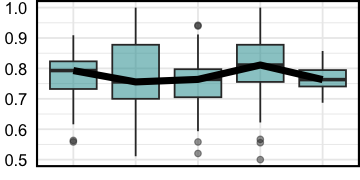

In [17]:
data <- read.csv('/path/to/data/met_mast_forward.csv', sep = ",", header = T, row.names = NULL)
data <- gather(data, key = "metrics", value ="value", -model, -para, -group, -type)
data <- data %>% filter(model == 'LSTM') %>% filter(metrics == 'accuracy') %>% filter(group == 's') %>% filter(para != 'met_mast0')
data$para <- factor(data$para, levels=c("met_mast1", "met_mast2", "met_mast3", "met_mast4", "met_mast5"))

options(repr.plot.width=3, repr.plot.height=1.5)
ggplot(data, aes(x=para, y=value, fill=group)) + 
  geom_boxplot(position=position_dodge(0.8),alpha=0.5) +
  stat_summary(fun.y = median, geom = 'line', aes(group = group), position = position_dodge(width = 0.9), size = 2) +
scale_x_discrete(labels = c("met_mast1", "met_mast2", "met_mast3", "met_mast4", "met_mast5")) +
scale_fill_manual(values=c('#0a9396', '#94d2bd', '#e9d8a6', '#ca6702')) + 
scale_color_manual(values=c('#0a9396', '#94d2bd', '#e9d8a6', '#ca6702')) + 
 ylim(0.5, 1) +
    theme_minimal() + 
    theme(
    plot.title = element_text(color="black", size=0, face="bold"),
    strip.text = element_text(size=0, face="bold"),
    axis.text.y = element_text(colour = "black", size = 10), 
    axis.text.x = element_text(colour = "black", size = 0, angle = 90, vjust = 0.5, hjust = 1), 
    legend.text = element_text(size = 10, face ="bold", colour ="black"), 
    legend.position = "none", 
    axis.title.y = element_text(face = "bold", size = 0), 
    axis.title.x = element_text(face = "bold", size = 0, colour = "black"), 
    legend.title = element_text(size = 0, colour = "black", face = "bold"), 
    panel.background = element_blank(), 
    panel.border = element_rect(colour = "black", fill = NA, size = 1.2),
    legend.key=element_blank(),
    plot.margin = unit(c(0,0,0,0), "cm"))

#### Figure 5E

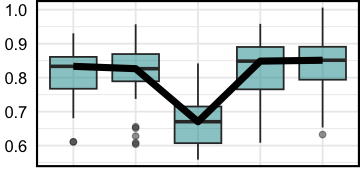

In [18]:
data <- read.csv('/path/to/data/met_mast_back.csv', sep = ",", header = T, row.names = NULL)
data <- gather(data, key = "metrics", value ="value", -model, -para, -group, -type)
data <- data %>% filter(model == 'LSTM') %>% filter(metrics == 'accuracy') %>% filter(group == 's') %>% filter(para != 'met_mast1')
data$para <- factor(data$para, levels=c("met_mast5", "met_mast4", "met_mast3", "met_mast2", "met_mast0"))

options(repr.plot.width=3, repr.plot.height=1.5)
ggplot(data, aes(x=para, y=value, fill=group)) + 
  geom_boxplot(position=position_dodge(0.8), alpha=0.5) +
  stat_summary(fun.y = median, geom = 'line', aes(group = group), position = position_dodge(width = 0.9), size = 2) +
scale_x_discrete(labels = c("met_mast5", "met_mast4", "met_mast3", "met_mast2", "met_mast0")) +
scale_fill_manual(values=c('#0a9396', '#94d2bd', '#e9d8a6', '#ca6702')) + # '#E68B81', '#EAAA60', '#7DA6C6', 'grey'
scale_color_manual(values=c('#0a9396', '#94d2bd', '#e9d8a6', '#ca6702')) + 
    theme_minimal() + 
    theme(
    plot.title = element_text(color="black", size=0, face="bold"),
    strip.text = element_text(size=0, face="bold"),
    axis.text.y = element_text(colour = "black", size = 10), 
    axis.text.x = element_text(colour = "black", size = 0, angle = 90, vjust = 0.5, hjust = 1), 
    legend.text = element_text(size = 10, face ="bold", colour ="black"), 
    legend.position = "none", 
    axis.title.y = element_text(face = "bold", size = 0), 
    axis.title.x = element_text(face = "bold", size = 0, colour = "black"), 
    legend.title = element_text(size = 0, colour = "black", face = "bold"), 
    panel.background = element_blank(), 
    panel.border = element_rect(colour = "black", fill = NA, size = 1.2),
    legend.key=element_blank(),
    plot.margin = unit(c(0,0,0,0), "cm"))